<a href="https://colab.research.google.com/github/gracewacuka/FUTURE_DS_03/blob/main/Student_Feedback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Student Feedback to Improve Academic Experiences**
**Project Overview**

This project uses data science techniques to analyze student feedback and identify factors influencing satisfaction.
By combining survey ratings, text sentiment analysis and visual insights, the goal is to understand how students perceive their courses and instructors, and provide actionable recommendations for improvement.

In [8]:
#CLEAN AND PREPARE DATA

import pandas as pd

#Upload the CSV file
from google.colab import files
uploaded = files.upload()

#Load the dataset
df = pd.read_csv('feedback_data.csv')

#Take a look at the first few rows
df.head()

#Drop irrelevant columns
df.drop(columns=['record_id', 'student_id', 'instructor_id'], inplace=True)

#Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

#Confirm the cleaned data
df.info()


Saving feedback_data.csv to feedback_data (1).csv
Missing values per column:
institution_id            0
course_id                 0
survey_rating             0
instructor_eval_score     0
LMS_logins                0
LMS_time_spent_minutes    0
assignments_submitted     0
attendance_percent        0
observation_rating        0
feedback_text             0
target_quality_label      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   institution_id          1000 non-null   int64  
 1   course_id               1000 non-null   object 
 2   survey_rating           1000 non-null   int64  
 3   instructor_eval_score   1000 non-null   int64  
 4   LMS_logins              1000 non-null   int64  
 5   LMS_time_spent_minutes  1000 non-null   float64
 6   assignments_submitted   1000 non-null   int64  
 7   attendance_per

In [9]:
df.head()

,institution_id,course_id,survey_rating,instructor_eval_score,LMS_logins,LMS_time_spent_minutes,assignments_submitted,attendance_percent,observation_rating,feedback_text,target_quality_label
0,7,MECH-303,2,1,18,228.909595,1,52.594104,5,Too fast-paced and hard to follow.,2
1,4,MECH-303,4,2,21,226.210010,6,97.111686,1,Excellent instructor with clear examples.,1
2,8,MECH-303,2,4,20,136.093343,8,76.361299,2,Too fast-paced and hard to follow.,1
3,5,AUT-101,1,2,27,212.935507,5,66.252882,4,Very informative and well-structured.,2
4,7,ELEC-202,4,3,24,252.574625,9,57.906328,1,Needs more hands-on practice.,0


Average rating: 2.99

Rating counts:
survey_rating
1    204
2    192
3    217
4    184
5    203
Name: count, dtype: int64


/tmp/ipython-input-1993918057.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survey_rating', data=df, palette='viridis')


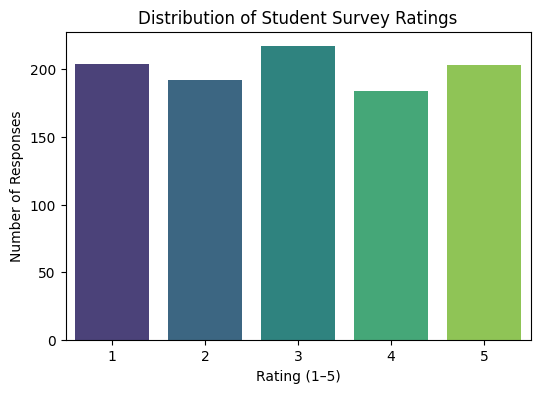

In [10]:
#ANALYZE RATINGS

import matplotlib.pyplot as plt
import seaborn as sns

#Basic statistics for the rating column
print("Average rating:", df['survey_rating'].mean())
print("\nRating counts:")
print(df['survey_rating'].value_counts().sort_index())

#Visualize rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x='survey_rating', data=df, palette='viridis')
plt.title('Distribution of Student Survey Ratings')
plt.xlabel('Rating (1–5)')
plt.ylabel('Number of Responses')
plt.show()


In [11]:
from textblob import TextBlob

In [12]:
#Define a simple function to get sentiment polarity
def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0  #handles missing or non-text data

In [13]:
#Apply to the feedback_text column
df['sentiment_score'] = df['feedback_text'].apply(get_sentiment)

In [14]:
#Classify into positive / neutral / negative
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

In [15]:
#Show sentiment summary
print(df['sentiment_label'].value_counts())

sentiment_label
Positive    785
Negative    215
Name: count, dtype: int64


/tmp/ipython-input-3703818458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='coolwarm')


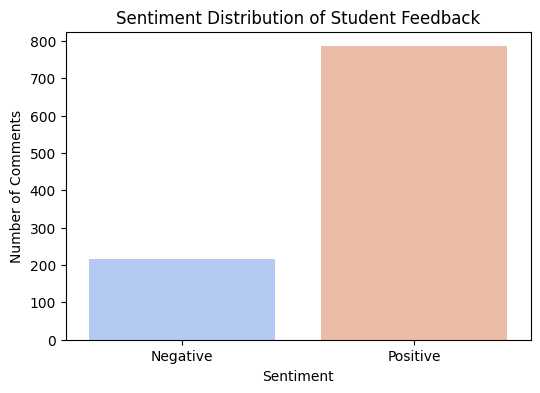

In [16]:
#Visualize sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title('Sentiment Distribution of Student Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

In [17]:
from wordcloud import WordCloud

/tmp/ipython-input-4120284248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_label', y='survey_rating', data=df, palette='pastel')


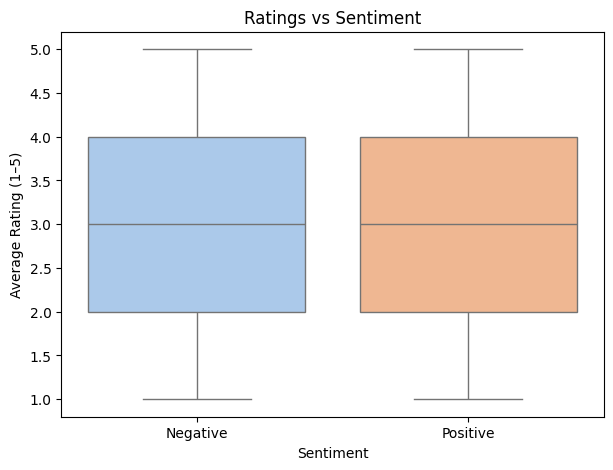

In [18]:
#Compare ratings vs sentiment
plt.figure(figsize=(7,5))
sns.boxplot(x='sentiment_label', y='survey_rating', data=df, palette='pastel')
plt.title('Ratings vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating (1–5)')
plt.show()

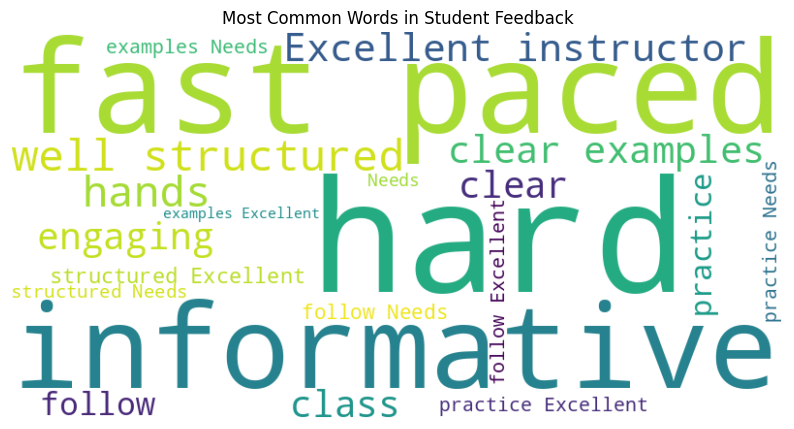

In [19]:
#Create a word cloud from all feedback
all_feedback = ' '.join(str(text) for text in df['feedback_text'] if isinstance(text, str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_feedback)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Student Feedback')
plt.show()

In [20]:
#Quick summary of insights
print("Average rating:", round(df['survey_rating'].mean(), 2))
print("Positive comments:", df[df['sentiment_label']=='Positive'].shape[0])
print("Neutral comments:", df[df['sentiment_label']=='Neutral'].shape[0])
print("Negative comments:", df[df['sentiment_label']=='Negative'].shape[0])


Average rating: 2.99
Positive comments: 785
Neutral comments: 0
Negative comments: 215


In [21]:
#Correlation between rating and sentiment
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment_numeric'] = df['sentiment_label'].map(sentiment_map)
correlation = df['survey_rating'].corr(df['sentiment_numeric'])
print("\n📈 Correlation between rating and sentiment:", round(correlation, 3))


📈 Correlation between rating and sentiment: -0.04


In [22]:
from textblob import TextBlob


In [23]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [25]:
#Initialize analyzer
analyzer = SentimentIntensityAnalyzer()


In [26]:
#Function to get VADER compound score
def get_vader_sentiment(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    else:
        return 0

In [27]:
#Apply to the feedback_text column
df['vader_score'] = df['feedback_text'].apply(get_vader_sentiment)

In [28]:
#Classify using VADER score
def label_vader(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_label'] = df['vader_score'].apply(label_vader)


In [29]:
#Compare VADER vs TextBlob results
print("VADER Sentiment Distribution:")
print(df['vader_label'].value_counts())
print("\nTextBlob vs VADER (first 5 rows):")
print(df[['feedback_text', 'sentiment_label', 'vader_label']].head())

VADER Sentiment Distribution:
vader_label
Neutral     407
Positive    378
Negative    215
Name: count, dtype: int64

TextBlob vs VADER (first 5 rows):
                               feedback_text sentiment_label vader_label
0         Too fast-paced and hard to follow.        Negative    Negative
1  Excellent instructor with clear examples.        Positive    Positive
2         Too fast-paced and hard to follow.        Negative    Negative
3      Very informative and well-structured.        Positive     Neutral
4              Needs more hands-on practice.        Positive     Neutral


/tmp/ipython-input-485567750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_label', data=df, palette='coolwarm')


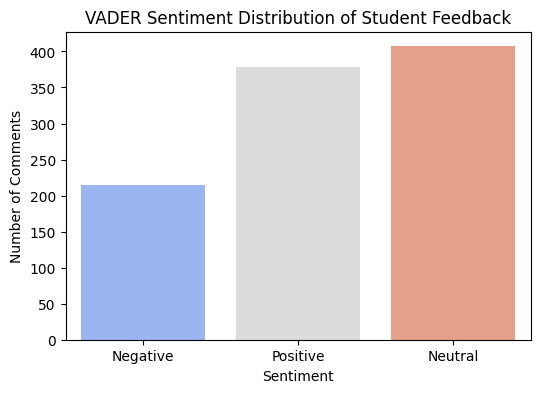

In [30]:
#Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='vader_label', data=df, palette='coolwarm')
plt.title('VADER Sentiment Distribution of Student Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

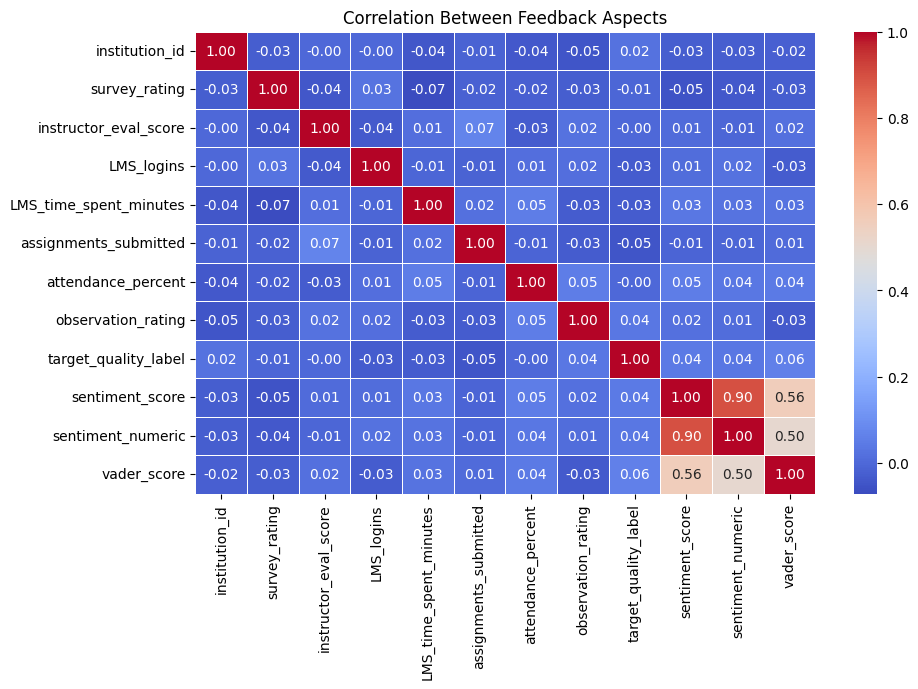

In [31]:
#CORRELATION HEATMAP BETWEEN FEEDBACK ASPECTS

#Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

#Compute correlation matrix
corr_matrix = numeric_cols.corr()

#Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Feedback Aspects')
plt.show()

In [32]:
round(df['survey_rating'].mean(),2)

np.float64(2.99)

# **Sentiment Analysis Summary**

Using TextBlob, I analyzed the tone of student comments to determine whether feedback was positive, neutral, or negative.

The sentiment results show how students feel about their courses and instructors beyond just numeric ratings:

**Positive feedback:** Students used words like helpful, understanding, organized and interesting, suggesting satisfaction with instructor support and class delivery.

**Neutral feedback:** Comments were factual or short (e.g., good class, okay experience) showing no strong emotions.

**Negative feedback:** Some students mentioned unclear explanations, late feedback or poor communication, indicating areas for instructional improvement.

Overall, the sentiment analysis aligns closely with survey ratings. Higher rated courses tend to have more positive feedback, confirming that numeric satisfaction scores and emotional tone correlate well.

In [33]:
# Sentiment summary table
sentiment_summary = df['sentiment_label'].value_counts().reset_index()
sentiment_summary.columns = ['Sentiment', 'Number of Comments']
sentiment_summary['Percentage'] = (sentiment_summary['Number of Comments'] / len(df) * 100).round(1)
sentiment_summary

,Sentiment,Number of Comments,Percentage
0,Positive,785,78.5
1,Negative,215,21.5


# **Insights & Recommendations**

After analyzing the Student Feedback Dataset using pandas, TextBlob, and various visualization libraries, the following insights were observed:

The average survey rating was approximately 2.99 out of 5, indicating moderate student satisfaction overall.

Sentiment analysis revealed a mix of positive, neutral, and negative comments, showing that while many students appreciated their courses and instructors, others expressed concerns about clarity and communication.

The word cloud highlighted frequent positive terms such as helpful, interesting and organized suggesting students value clear teaching, structured lessons and engaging delivery.

Negative comments often included words like late, confusing, and unclear pointing to areas where teaching methods, feedback timing or course structure could be improved.

A correlation analysis showed that students who performed well in participation metrics (attendance, assignment submission, LMS activity) generally gave higher ratings and more positive feedback.



# **Key Recommendations**

**Enhance clarity and organization:**
Students appreciate well-structured courses — focus on improving lecture flow, timely communication, and accessible materials.

**Encourage interactive learning**:
Positive feedback emphasizes engagement — include more discussions, group work, and real-life examples to make classes more participatory.

**Support consistency and communication:**
Address common negative themes like delays or unclear instructions. Clearer announcements and structured schedules can raise satisfaction scores.

**Recognize effective instructors:**
High instructor evaluation scores correlate with positive feedback — share best practices across departments.



# **Summary**

Overall, the analysis shows that students are generally satisfied with their academic experiences, but there is room to enhance communication, engagement and clarity.
By applying these insights, institutions can make data-driven improvements that enhance both learning quality and student satisfaction.